In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("fault_frequency.csv")

In [3]:
data

,FTF_data,BPFO_data,BPFI_data,BSF_data,fault_type
0,2200.769903,4327.878763,8389.776793,2581.446329,1
1,11539.629574,17578.102331,19151.411555,17345.107060,1
2,10422.500951,17890.496095,18704.516368,14969.934173,1
3,5505.022431,8882.389391,13984.089825,8147.900948,1
4,2520.057595,4167.467604,9068.812238,2888.956012,1
...,...,...,...,...,...
1714,109.460797,396.155495,315.042338,360.887477,0
1715,106.936037,387.238379,293.976590,379.633629,0
1716,113.210066,408.432219,371.249572,384.355320,0
1717,111.799995,387.396616,295.473329,354.604154,0


In [4]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 데이터 분할 (X: 특성, y: 타겟 레이블)
X = data.drop(columns=['fault_type'])
y = data['fault_type']

# 데이터 세트 분할 (80% 학습용, 20% 테스트용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LGBM 모델 초기화
lgbm_model = LGBMClassifier(boosting_type='gbdt', objective='multiclass', random_state=42)

# 모델 학습
lgbm_model.fit(X_train, y_train)

# 예측 수행
y_pred = lgbm_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1375, number of used features: 4
[LightGBM] [Info] Start training from score -1.406126
[LightGBM] [Info] Start training from score -1.385567
[LightGBM] [Info] Start training from score -1.340105
[LightGBM] [Info] Start training from score -1.415068
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler


X = data.drop(columns=['fault_type'])
y = data['fault_type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm_model = SVC(kernel='rbf', random_state=42)


svm_model.fit(X_train_scaled, y_train)


y_pred = svm_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9651162790697675
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        92
           1       0.97      0.99      0.98        86
           2       0.98      0.87      0.92        70
           3       1.00      0.98      0.99        96

    accuracy                           0.97       344
   macro avg       0.97      0.96      0.96       344
weighted avg       0.97      0.97      0.96       344



In [2]:
data = pd.read_csv('fault_frequency_range.csv')

In [15]:
data[850:8800]

,FTF_data,BPFO_data,BPFI_data,BSF_data,fault_type
850,404.632910,2255.059566,372.475432,1914.107106,2
851,295.373127,1997.597464,428.867149,1722.170256,2
852,360.178985,2326.100037,414.247100,1748.804019,2
853,376.144919,2005.904033,402.915282,1763.403394,2
854,403.188726,2149.838868,427.917904,1976.021161,2
...,...,...,...,...,...
1714,109.460797,396.155495,315.042338,360.887477,0
1715,106.936037,387.238379,293.976590,379.633629,0
1716,113.210066,408.432219,371.249572,384.355320,0
1717,111.799995,387.396616,295.473329,354.604154,0


C:\Users\medici\AppData\Local\Temp\ipykernel_10188\3546077738.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([subset_data['FTF_data'], subset_data['BPFO_data'], subset_data['BPFI_data'], subset_data['BSF_data']],


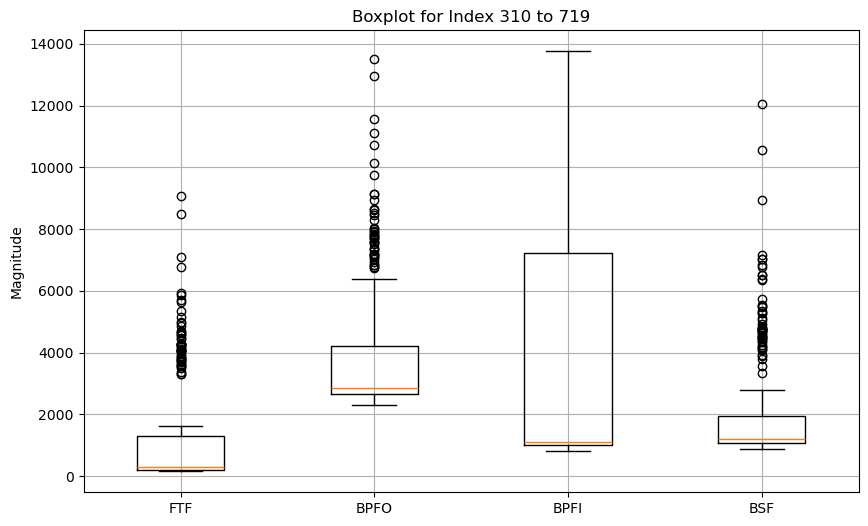

In [14]:
import matplotlib.pyplot as plt

# Index 310부터 719까지의 데이터를 추출
subset_data = data.iloc[310:720]

# boxplot을 그리기 위해 데이터의 주요 열 선택
plt.figure(figsize=(10, 6))
plt.boxplot([subset_data['FTF_data'], subset_data['BPFO_data'], subset_data['BPFI_data'], subset_data['BSF_data']],
            labels=['FTF', 'BPFO', 'BPFI', 'BSF'])
plt.title("Boxplot for Index 310 to 719")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()
